In [1]:
# Impot the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-18.49850382446415 19.37910133301935
28.98824414230363 -42.42677240898297
-88.42094237622146 142.76258180974241
-88.83895931444674 136.33201115135375
-23.52356350316859 -56.59741718446861
77.10240440649602 -24.94581066078581
-11.480172023975967 -47.054687339844065
-88.0160687376309 -16.562932263344237
-79.9341628427485 168.38907217857337
-41.98224470807939 -2.67207756578523
-30.459002950055122 0.822365330689621
-4.297205726989603 97.1886554503368
-75.02694940731423 36.036797451732554
-43.2976406678866 79.4368848966277
23.35000815887787 97.87197854057536
57.75024546457763 -13.450352331283653
-3.3849525246834418 -125.32672793216915
50.27431790365509 45.93114920991093
58.01877884474115 149.50581389818637
-2.1039527023417293 -58.5842755160982
-11.525664595417766 -125.36484663486408
86.60070449419888 8.245298991548736
-85.03909890036046 -118.4760168114315
20.55545997464013 117.08660117823308
15.089830826787022 -68.27014838386549
-80.6846846949724 58.72224582143832
35.862895069944614 142.021

-86.73173073940839 -27.382278558843467
-6.662102504995005 -69.21470128852057
22.67431984972383 -175.43447088871062
-69.88924809058898 53.331952370032525
41.33164227286113 35.72863381753723
-34.94860838583352 60.86506727789157
-1.993553444526114 17.038215237771396
70.29158823884049 -93.74411576957344
66.94499567191147 -171.14253433606396
-16.48303438672562 162.44277769574268
66.96460637133592 -121.80949052793451
-51.1490232542552 82.01187522755487
52.75496539594221 -31.97585942953438
-34.87418919680813 -143.65177672545175
21.17567748664146 93.34604674360145
85.02419487516258 121.01217132256244
41.452362637632916 96.30332754345977
78.2728320269537 -5.312329337100351
-50.84513588303213 119.2637757341538
-39.9155503562876 -132.50577313702792
85.10978391347584 -76.7567530360558
78.07303333135027 -52.40202527001301
-68.16040326171195 -111.51821134509699
-30.57467459243037 76.43349334948618
20.244563320720474 71.39343655278418
78.49140935172221 89.97976887337546
-28.826839631571204 -23.016698

-56.20325854966827 -58.249017041634886
-17.360184373912034 46.367391680992455
86.79180327953998 87.93933965029055
85.49450638981625 89.33597452742481
-22.698186205157754 -169.6484149857303
9.1755215511795 -89.64562823582979
-61.50664438439452 -152.10262169507982
73.82147331320436 29.253406755066464
-78.19300742812469 -40.228501950167356
-11.505489838842095 -5.8639799724257955
54.56142673166414 127.64856666954984
-47.947566342228676 -174.27458047911827
-58.97934563645933 -121.01530218810541
74.4470702932488 146.47923787415607
-85.4485957349446 77.7518431181648
-39.07969112126702 -64.92164937472113
46.10521898975733 172.7176464210121
80.16276621088682 -92.07109576495583
-43.97870151080436 -125.7770520636014
-75.84970987774675 -97.7040927558181
-52.228662035773134 112.96772322345817
5.716526325010435 116.35699765455013
-71.30903811561262 -101.7233186769767
-23.391698653294313 158.61961749510908
-18.87304891848504 18.798604270973613
53.546232160245665 70.29851108735775
41.66528852145066 25

In [5]:
# Import the citipy module
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

639

# Get the City Weather Data

In [7]:
# Import your requests ibrary and the weather_api_key
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime



In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         })
        
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rundu
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | tacuati
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | dianopolis
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | padang
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | lashio
Processing Record 15 of Set 1 | westport
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | rovnoye
Processing Record 18 of Set 1 | arman
Processing Record 19 of Set 1 | urucara
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | punta ar

Processing Record 39 of Set 4 | changping
Processing Record 40 of Set 4 | marcona
City not found. Skipping...
Processing Record 41 of Set 4 | ola
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | port arthur
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | amga
Processing Record 47 of Set 4 | evensk
Processing Record 48 of Set 4 | malanje
Processing Record 49 of Set 4 | baykit
Processing Record 50 of Set 4 | aykhal
Processing Record 1 of Set 5 | ust-kuyga
Processing Record 2 of Set 5 | cockburn town
Processing Record 3 of Set 5 | markdale
Processing Record 4 of Set 5 | denpasar
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | nouadhibou
Processing Record 7 of Set 5 | sibolga
Processing Record 8 of Set 5 | ilulissat
Processing Record 9 of Set 5 | wodonga
Processing Record 10 of Set 5 | rudnogorsk
Processing Record 11 of Set 5 | nam tha
City not found. Ski

Processing Record 30 of Set 8 | hattiesburg
Processing Record 31 of Set 8 | oranjemund
Processing Record 32 of Set 8 | vestmanna
Processing Record 33 of Set 8 | jumla
Processing Record 34 of Set 8 | pevek
Processing Record 35 of Set 8 | palmer
Processing Record 36 of Set 8 | coolum beach
Processing Record 37 of Set 8 | tepecoacuilco
City not found. Skipping...
Processing Record 38 of Set 8 | tangshan
Processing Record 39 of Set 8 | sipe sipe
Processing Record 40 of Set 8 | yelizovo
Processing Record 41 of Set 8 | new london
Processing Record 42 of Set 8 | brownwood
Processing Record 43 of Set 8 | springbok
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | redlands
Processing Record 46 of Set 8 | taoudenni
Processing Record 47 of Set 8 | constitucion
Processing Record 48 of Set 8 | doka
Processing Record 49 of Set 8 | tomatlan
Processing Record 50 of Set 8 | kruisfontein
Processing Record 1 of Set 9 | drumheller
Processing Record 2 of Set 9 | hami
Processing 

Processing Record 18 of Set 12 | guntur
Processing Record 19 of Set 12 | dudinka
Processing Record 20 of Set 12 | den helder
Processing Record 21 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 22 of Set 12 | bijar
Processing Record 23 of Set 12 | caldwell
Processing Record 24 of Set 12 | adzhamka
Processing Record 25 of Set 12 | akdepe
Processing Record 26 of Set 12 | vao
Processing Record 27 of Set 12 | anadyr
Processing Record 28 of Set 12 | kununurra
Processing Record 29 of Set 12 | guanare
Processing Record 30 of Set 12 | coffs harbour
Processing Record 31 of Set 12 | inirida
Processing Record 32 of Set 12 | kirakira
Processing Record 33 of Set 12 | orange
Processing Record 34 of Set 12 | moskovskiy
Processing Record 35 of Set 12 | shaowu
Processing Record 36 of Set 12 | antigonish
Processing Record 37 of Set 12 | guantanamo
Processing Record 38 of Set 12 | lampa
Processing Record 39 of Set 12 | sabaudia
Processing Record 40 of Set 12 | fenoarivo
Processing 

In [11]:
len(city_data)

591

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame using
# df = pd.DataFrame(list with dictionaries)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rundu,-17.9333,19.7667,79.09,19,1,8.41,NA,2022-07-12 14:19:14
1,Ribeira Grande,38.5167,-28.7000,75.60,73,20,9.22,PT,2022-07-12 14:19:15
2,Hobart,-42.8794,147.3294,46.26,88,40,9.22,AU,2022-07-12 14:15:34
3,Tacuati,-23.4500,-56.5833,60.73,71,78,6.67,PY,2022-07-12 14:19:16
4,Ushuaia,-54.8000,-68.3000,37.06,87,100,13.80,AR,2022-07-12 14:15:04
5,Bluff,-46.6000,168.3333,42.80,92,100,21.90,NZ,2022-07-12 14:19:21
6,Saldanha,-33.0117,17.9442,59.22,69,0,7.36,ZA,2022-07-12 14:17:33
7,Luderitz,-26.6481,15.1594,64.60,55,0,21.97,NA,2022-07-12 14:19:23
8,Padang,-0.9492,100.3543,77.97,89,79,4.03,ID,2022-07-12 14:19:24
9,Port Elizabeth,-33.9180,25.5701,64.31,61,0,4.61,ZA,2022-07-12 14:19:25


In [13]:
# Reorder the columns by assigning a variable to an array of the columns in the desired order
# new_column_order = ["column2", "column4", "column1"]
# Then, we assign a new or the same DataFrame with new column order:
# df = df[new_column_order]

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rundu,NA,2022-07-12 14:19:14,-17.9333,19.7667,79.09,19,1,8.41
1,Ribeira Grande,PT,2022-07-12 14:19:15,38.5167,-28.7000,75.60,73,20,9.22
2,Hobart,AU,2022-07-12 14:15:34,-42.8794,147.3294,46.26,88,40,9.22
3,Tacuati,PY,2022-07-12 14:19:16,-23.4500,-56.5833,60.73,71,78,6.67
4,Ushuaia,AR,2022-07-12 14:15:04,-54.8000,-68.3000,37.06,87,100,13.80
5,Bluff,NZ,2022-07-12 14:19:21,-46.6000,168.3333,42.80,92,100,21.90
6,Saldanha,ZA,2022-07-12 14:17:33,-33.0117,17.9442,59.22,69,0,7.36
7,Luderitz,NA,2022-07-12 14:19:23,-26.6481,15.1594,64.60,55,0,21.97
8,Padang,ID,2022-07-12 14:19:24,-0.9492,100.3543,77.97,89,79,4.03
9,Port Elizabeth,ZA,2022-07-12 14:19:25,-33.9180,25.5701,64.31,61,0,4.61


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
import os

# File to load
data_to_load = os.path.join("weather_data", "cities.csv")

# Read the school data file and store it in a Pandas DataFrame.
city_data_df = pd.read_csv(data_to_load)
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Rundu,NaN,2022-07-12 14:19:14,-17.9333,19.7667,79.09,19,1,8.41
1,1,Ribeira Grande,PT,2022-07-12 14:19:15,38.5167,-28.7000,75.60,73,20,9.22
2,2,Hobart,AU,2022-07-12 14:15:34,-42.8794,147.3294,46.26,88,40,9.22
3,3,Tacuati,PY,2022-07-12 14:19:16,-23.4500,-56.5833,60.73,71,78,6.67
4,4,Ushuaia,AR,2022-07-12 14:15:04,-54.8000,-68.3000,37.06,87,100,13.80
...,...,...,...,...,...,...,...,...,...,...
586,586,Pachora,IN,2022-07-12 14:41:20,20.6667,75.3500,74.88,86,100,14.43
587,587,Magdagachi,RU,2022-07-12 14:41:22,53.4500,125.8000,60.28,99,100,6.55
588,588,Killybegs,IE,2022-07-12 14:41:22,54.6333,-8.4500,60.51,71,15,11.72
589,589,Masvingo,ZW,2022-07-12 14:41:24,-20.0637,30.8277,69.40,28,17,8.86


# Plotting the Data

In [16]:
# Extract relevant fields from teh DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

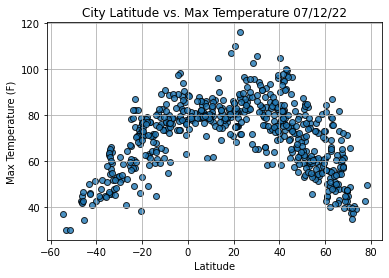

In [17]:
# Import time module

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properites.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

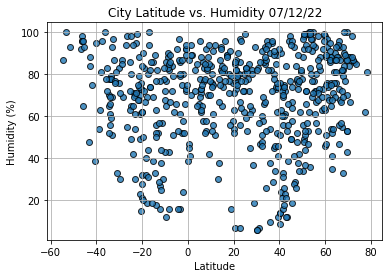

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properites.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

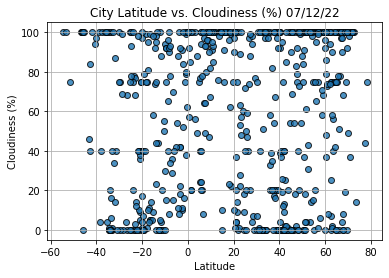

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properites.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

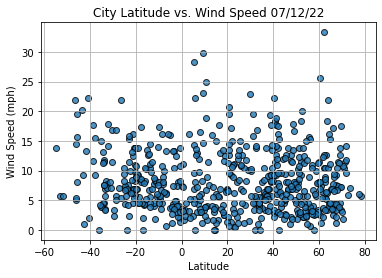

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properites.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Create regression line for latitude and max temp, humidity, cloudiness, and wind speed for Northern and Southern Hemispheres

In [33]:
# Import linregress
from scipy.stats import linregress


# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    
    
    # Run linear regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)

    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")

    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
# Create a hemisphere DataFrame from the city_data_df using the loc method
# row = df.loc[row_index]
# index13 = city_data_df.loc[13]
# index13

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Ribeira Grande,PT,2022-07-12 14:19:15,38.5167,-28.7000,75.60,73,20,9.22
11,11,Lashio,MM,2022-07-12 14:19:28,22.9333,97.7500,71.94,97,63,0.51
12,12,Westport,US,2022-07-12 14:19:29,41.1415,-73.3579,82.09,74,0,9.22
14,14,Rovnoye,RU,2022-07-12 14:15:13,50.7765,46.0509,82.63,49,0,10.22
15,15,Arman,RU,2022-07-12 14:19:33,59.7000,150.1667,61.02,98,96,3.36


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

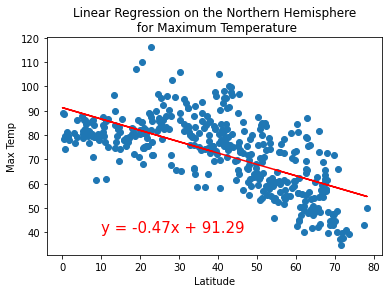

In [68]:
# Linear regression on the Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(10,40))

In [69]:
linregress(x_values,y_values)

LinregressResult(slope=-0.467080760414229, intercept=91.28551558952384, rvalue=-0.6445649329659922, pvalue=1.0839082182391544e-48, stderr=0.027666789581311548, intercept_stderr=1.2265373977991083)

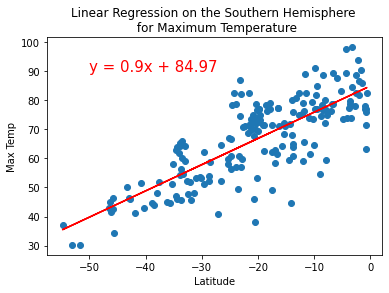

In [70]:
# Linear regression on the Southern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

In [71]:
linregress(x_values,y_values)

LinregressResult(slope=0.9032542672023237, intercept=84.9671430218251, rvalue=0.7957477918193714, pvalue=2.2637152135536148e-42, stderr=0.050406223233564154, intercept_stderr=1.2121006223601272)

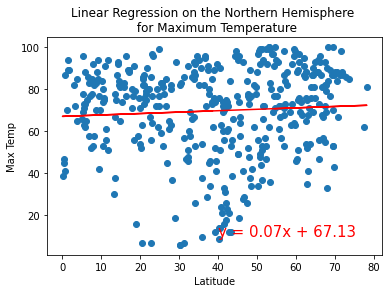

In [72]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(40,10))

In [73]:
linregress(x_values,y_values)

LinregressResult(slope=0.06738275491990674, intercept=67.12513159357532, rvalue=0.06272600343160051, pvalue=0.20891951048958385, stderr=0.05353932567574553, intercept_stderr=2.3735310886451937)

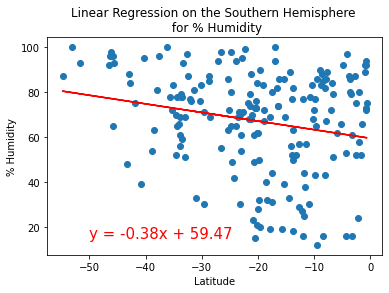

In [74]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,15))

In [75]:
linregress(x_values,y_values)

LinregressResult(slope=-0.38302845820130593, intercept=59.47114798990985, rvalue=-0.2167715779865279, pvalue=0.002808000307146046, stderr=0.12647974430215425, intercept_stderr=3.041413677716454)

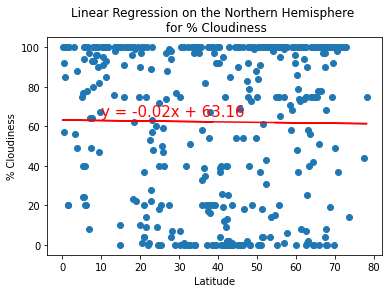

In [76]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(10,65))

In [77]:
linregress(x_values,y_values)

LinregressResult(slope=-0.023074024189435587, intercept=63.1627749408503, rvalue=-0.01177797258644428, pvalue=0.8136539079627111, stderr=0.09782514340672585, intercept_stderr=4.336831220723159)

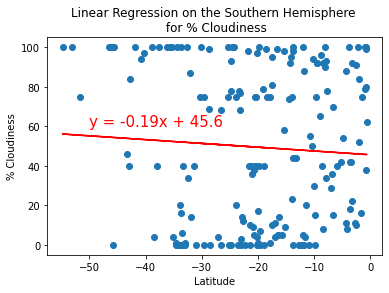

In [78]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-50,60))

In [79]:
linregress(x_values,y_values)

LinregressResult(slope=-0.19161794379107425, intercept=45.6004788675919, rvalue=-0.06236913693713668, pvalue=0.3951653697304288, stderr=0.22483485516552315, intercept_stderr=5.406524242286699)

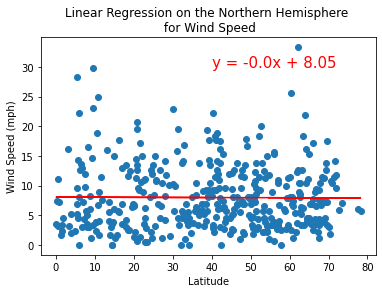

In [80]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)',(40,30))

In [81]:
linregress(x_values,y_values)

LinregressResult(slope=-0.0016454244307212932, intercept=8.04963368571037, rvalue=-0.006148056570944577, pvalue=0.9020760812190295, stderr=0.013364714693191448, intercept_stderr=0.592490947818076)

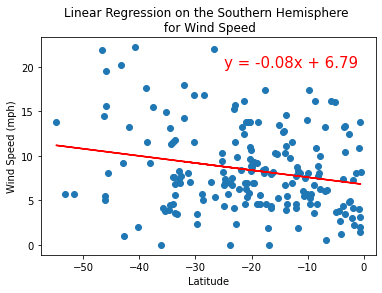

In [82]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)',(-25,20))

In [83]:
linregress(x_values,y_values)

LinregressResult(slope=-0.08003537678618301, intercept=6.793126355942871, rvalue=-0.21888837660180224, pvalue=0.002545216383535965, stderr=0.026160216835695898, intercept_stderr=0.6290654818690884)